Yafa Naji 1200708

Noor

# **Part 1: K-Nearest Neighbors (KNN)**


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
# Load the dataset
data = pd.read_csv('/content/Breast_cancer_data.csv')
data.head()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  
Unique values in 'diagnosis': [0 1]
Missing values in the features:
mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
dtype: int64
Missing values in the target variable 'y': 0
Missing values in the features after dropna:
mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
dtype: int64
Length of X: 569
Length of y: 569
Best K for euclidean: 18 

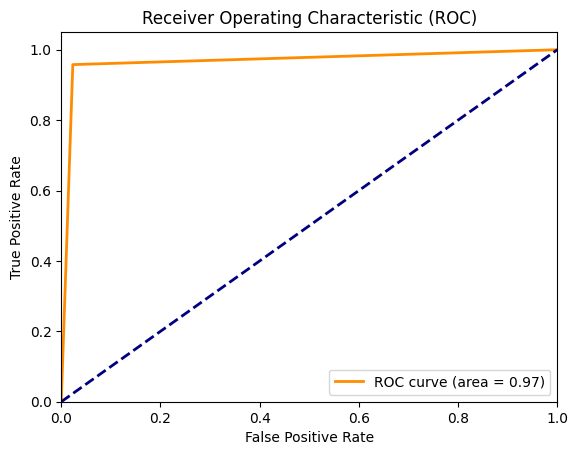

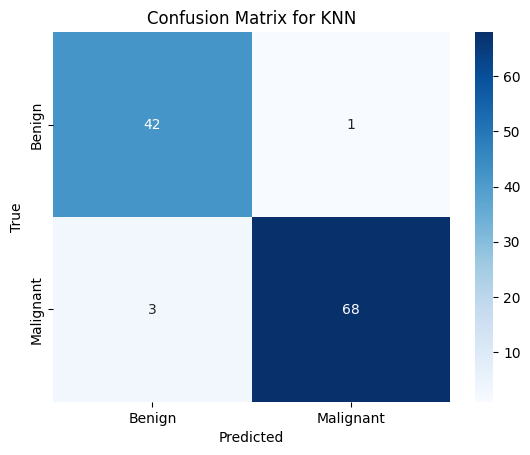

In [70]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Load the dataset
data = pd.read_csv('/content/Breast_cancer_data.csv')

# Display the first few rows of the data to ensure it's loaded correctly
print(data.head())

# Check if 'diagnosis' is in the dataset columns
if 'diagnosis' in data.columns:
    # Separate features (X) and target variable (y)
    X = data.drop('diagnosis', axis=1)  # Features (all columns except 'diagnosis')
    y = data['diagnosis']  # Target variable ('diagnosis')

    # Check the unique values in 'diagnosis' to confirm its format
    print("Unique values in 'diagnosis':", y.unique())

    # Map the target variable to numerical values (if it's not already)
    if y.dtype == 'object':  # if the diagnosis is categorical (e.g., 'M' and 'B')
        y = y.map({'M': 1, 'B': 0})  # Assuming 'M' is Malignant (1) and 'B' is Benign (0))

    # Check if there are any missing values in X or y
    print("Missing values in the features:")
    print(X.isnull().sum())
    print("Missing values in the target variable 'y':", y.isnull().sum())

    # Handle missing values in the features by dropping rows with NaN values
    X = X.dropna()

    # Check if there are any missing values left in the features after dropping NaNs
    print("Missing values in the features after dropna:")
    print(X.isnull().sum())

    # Ensure that y doesn't have missing values
    y = y.dropna()  # Remove any rows with NaN values in the target

    # Check the lengths of X and y
    print(f"Length of X: {len(X)}")
    print(f"Length of y: {len(y)}")

    # If lengths match, proceed with splitting the data
    if len(X) == len(y):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Scale the data (necessary for KNN)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Test KNN with different distance metrics and values for K
        metrics = ['euclidean', 'manhattan', 'cosine']
        best_k = 0
        best_score = 0
        best_model = None
        results = {}

        for metric in metrics:
            # Search for the best value of K using cross-validation
            best_metric_score = 0
            for k in range(1, 21):  # Try K values from 1 to 20
                knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
                cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
                mean_score = cv_scores.mean()
                if mean_score > best_metric_score:
                    best_metric_score = mean_score
                    best_k = k
                    best_model = knn
            results[metric] = best_metric_score
            print(f"Best K for {metric}: {best_k} with score: {best_metric_score:.4f}")

        # Display the results for each metric
        print("Performance for each distance metric:")
        for metric, score in results.items():
            print(f"{metric}: {score:.4f}")

        # Apply the best model
        best_model.fit(X_train_scaled, y_train)
        y_pred = best_model.predict(X_test_scaled)

        # Evaluate the model using the required metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)

        print(f"\nEvaluation on test set:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"ROC-AUC: {roc_auc:.4f}")

        # Calculate ROC curve manually
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve manually
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc="lower right")
        plt.show()

        # Plot the Confusion Matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix for KNN')
        plt.show()
    else:
        print("Mismatch in the number of samples between X and y. Please check your data.")
else:
    print("Target variable 'y' is empty. Please check the dataset.")


# **Part 2: Logistic Regression**


**Step 1: Train a Logistic Regression Model**

Logistic Regression Performance:
Accuracy: 0.9385964912280702
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

ROC-AUC Score: 0.932361611529643


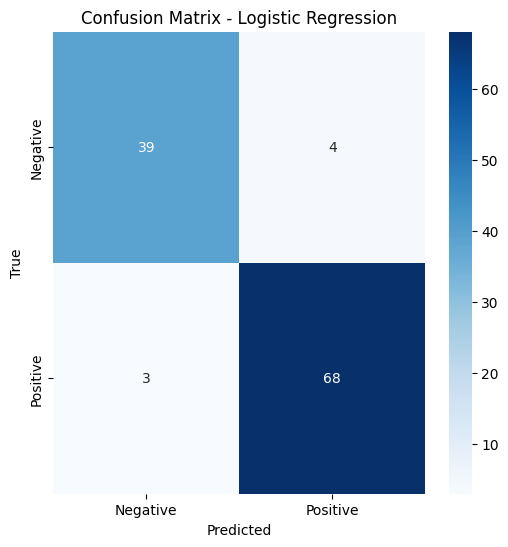

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Breast_cancer_data.csv')  # Make sure the dataset path is correct

# Assuming 'diagnosis' is the target column
X = df.drop(columns=['diagnosis'])  # Features
y = df['diagnosis']  # Target variable

# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model with L2 regularization (default)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluation metrics
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Step 2: Experiment with Different Regularization Techniques (L1 and L2**)


**L2 Regularization (Ridge):**

In [72]:
logreg_l2 = LogisticRegression(solver='liblinear', penalty='l2')
logreg_l2.fit(X_train, y_train)
y_pred_l2 = logreg_l2.predict(X_test)

# Evaluation metrics for L2
print("Logistic Regression with L2 Regularization Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_l2))
print("Classification Report:\n", classification_report(y_test, y_pred_l2))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_l2))


Logistic Regression with L2 Regularization Performance:
Accuracy: 0.9385964912280702
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

ROC-AUC Score: 0.932361611529643


**L1 Regularization (Lasso):**

In [73]:
logreg_l1 = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000)
logreg_l1.fit(X_train, y_train)
y_pred_l1 = logreg_l1.predict(X_test)

# Evaluation metrics for L1
print("Logistic Regression with L1 Regularization Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_l1))
print("Classification Report:\n", classification_report(y_test, y_pred_l1))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_l1))


Logistic Regression with L1 Regularization Performance:
Accuracy: 0.9385964912280702
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

ROC-AUC Score: 0.932361611529643


**Step 3: Evaluate the Performance Using Classification Metrics**


Logistic Regression with L2 Regularization:
Accuracy: 0.9385964912280702
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

ROC-AUC Score: 0.932361611529643


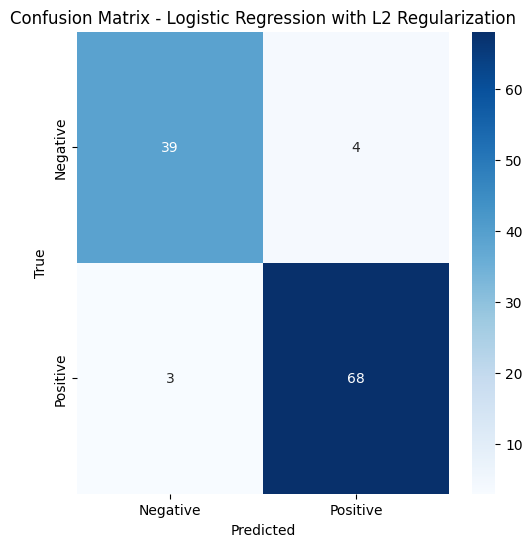

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Logistic Regression with L1 Regularization:
Accuracy: 0.9298245614035088
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

ROC-AUC Score: 0.9253193580085163


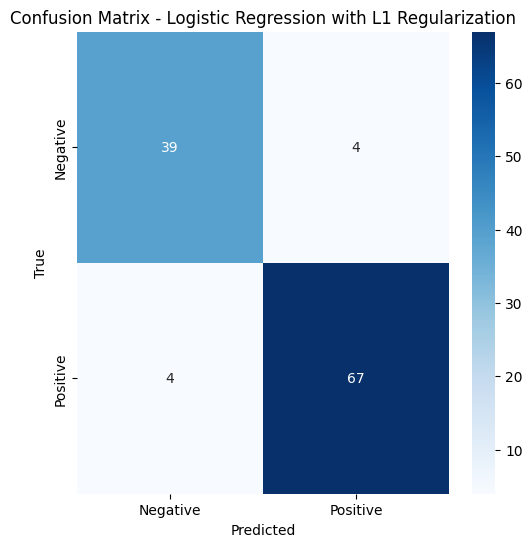

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/Breast_cancer_data.csv')  # Make sure the file path is correct

# Extract features (X) and target (y)
X = df.drop(columns=['diagnosis'])  # Features
y = df['diagnosis']  # Target

# Split the data into training and testing sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using L2 regularization (default)
logreg_l2 = LogisticRegression(solver='liblinear', penalty='l2')
logreg_l2.fit(X_train, y_train)

# Make predictions using the test data
y_pred_l2 = logreg_l2.predict(X_test)

# Evaluate the performance with L2 regularization
print("Logistic Regression with L2 Regularization:")
print("Accuracy:", accuracy_score(y_test, y_pred_l2))
print("Classification Report:\n", classification_report(y_test, y_pred_l2))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_l2))

# Plot confusion matrix for L2 regularization
conf_matrix_l2 = confusion_matrix(y_test, y_pred_l2)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_l2, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix - Logistic Regression with L2 Regularization")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Train the model using L1 regularization
logreg_l1 = LogisticRegression(solver='liblinear', penalty='l1')
logreg_l1.fit(X_train, y_train)

# Make predictions using the test data
y_pred_l1 = logreg_l1.predict(X_test)

# Evaluate the performance with L1 regularization
print("\nLogistic Regression with L1 Regularization:")
print("Accuracy:", accuracy_score(y_test, y_pred_l1))
print("Classification Report:\n", classification_report(y_test, y_pred_l1))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_l1))

# Plot confusion matrix for L1 regularization
conf_matrix_l1 = confusion_matrix(y_test, y_pred_l1)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_l1, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix - Logistic Regression with L1 Regularization")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Step 4: Compare Logistic Regression with KNN**


KNN Performance:
Accuracy: 0.9385964912280702
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.92      0.99      0.95        71

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

ROC-AUC Score: 0.9231903046184081


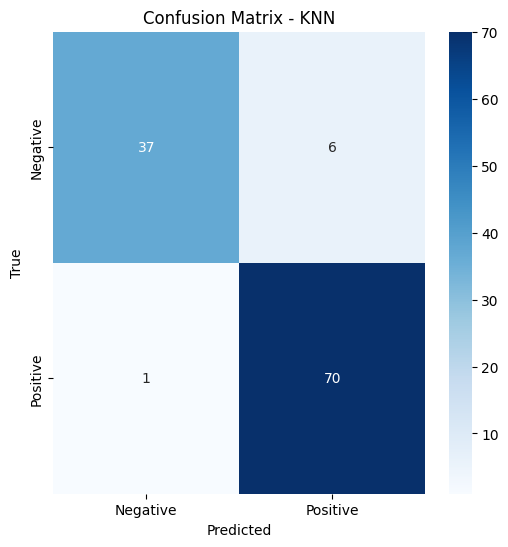

In [75]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN with default parameters
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# KNN Evaluation metrics
print("KNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_knn))

# Confusion Matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix - KNN")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **Part 3: Support Vector Machines (SVM)**


   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  
Unique values in 'diagnosis': [0 1]
Missing values in the features:
mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
dtype: int64
Missing values in the target variable 'y': 0
Length of X: 569
Length of y: 569
Comparison of SVM Models with Grid Search:
Kernel: linear
  Best Parameters: {'C': 10}
  Cross-Validation Accuracy: 0.9275
  Test Accuracy: 0.9474
  Precision: 0.9452
  Recall: 0.9718
  F1

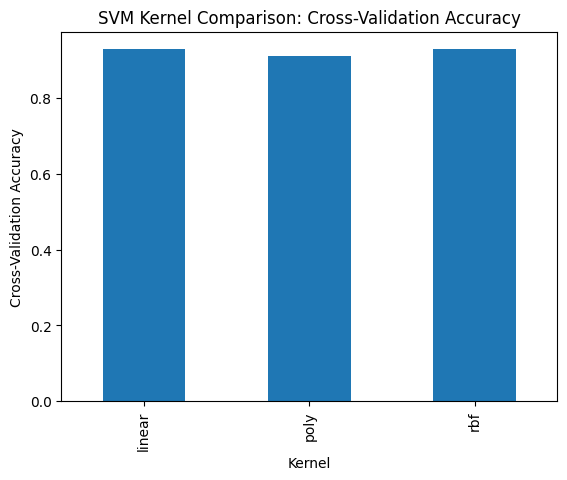

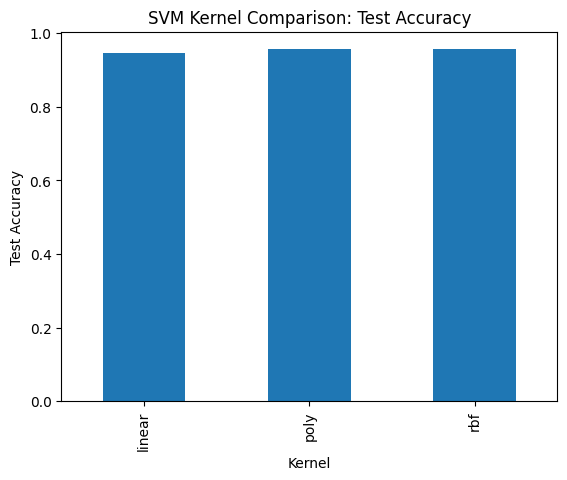

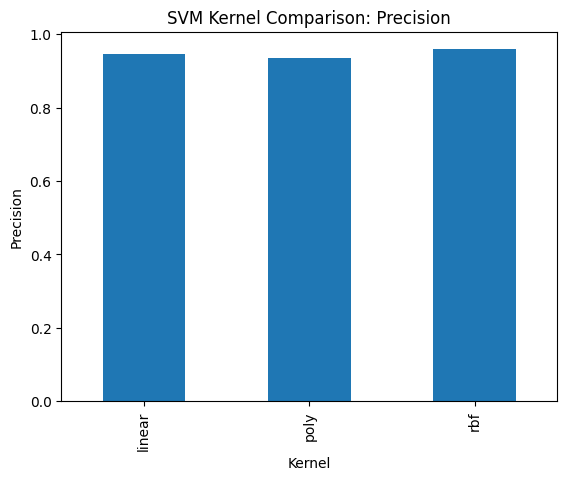

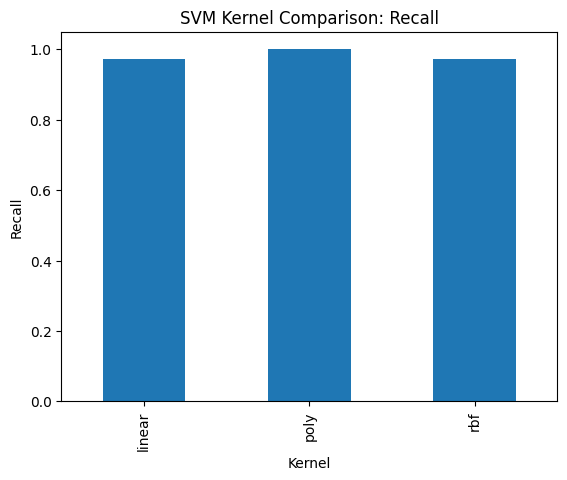

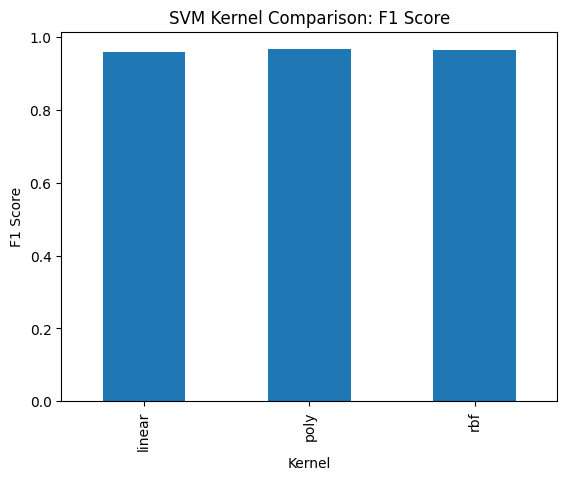

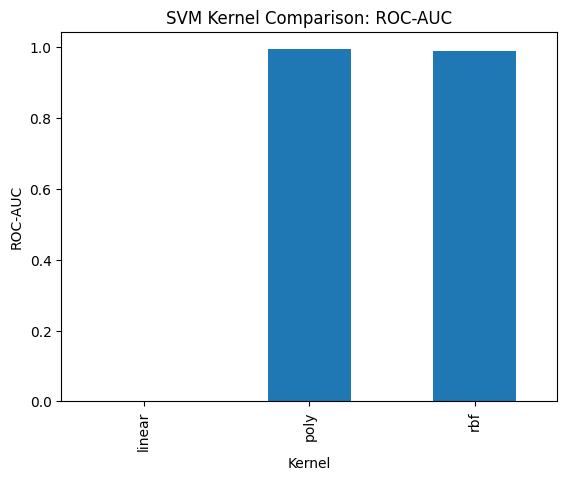

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/Breast_cancer_data.csv')

# Display the first few rows of the data to ensure it's loaded correctly
print(data.head())

#diagnosis column (target variable)
# Check if 'diagnosis' is in the dataset columns
if 'diagnosis' in data.columns:
    # Separate features (X) and target variable (y)
    X = data.drop('diagnosis', axis=1)  # Features (all columns except 'diagnosis')
    y = data['diagnosis']  # Target variable ('diagnosis')

    # Check the unique values in 'diagnosis' to confirm its format
    print("Unique values in 'diagnosis':", y.unique())

    # Map the target variable to numerical values (if it's not already)
    if y.dtype == 'object':  # if the diagnosis is categorical (e.g., 'M' and 'B')
        y = y.map({'M': 1, 'B': 0})  # Assuming 'M' is Malignant (1) and 'B' is Benign (0))

    # Check if there are any missing values in X or y
    print("Missing values in the features:")
    print(X.isnull().sum())
    print("Missing values in the target variable 'y':", y.isnull().sum())

    # Handle missing values in the features by dropping rows with NaN values
    X = X.dropna()

    # Ensure that y doesn't have missing values
    y = y.dropna()  # Remove any rows with NaN values in the target

    # Check the lengths of X and y
    print(f"Length of X: {len(X)}")
    print(f"Length of y: {len(y)}")

    # If lengths match, proceed with splitting the data
    if len(X) == len(y):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Scale the data (necessary for SVM)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        #C:Regularization parameter.
        #gamma:Kernel coefficient (used for poly and rbf kernels).
        #Controls the influence of individual data points.


        # Perform grid search for SVM models
        kernels = ['linear', 'poly', 'rbf']
        param_grid = {
            'C': [0.1, 1, 10],
            'gamma': [1, 0.1, 0.01]
        }
        results = {}


        for kernel in kernels:
            grid = GridSearchCV(
                #Initializes an SVM classifier with the specified kernel type (linear, poly, or rbf).
                #probability=True enables the calculation of class probabilities for evaluation (used for ROC-AUC).
                SVC(kernel=kernel, probability=True),
                #For the linear kernel, only C is used as a hyperparameter since gamma is not applicable.
                #For poly and rbf, both C and gamma are used.
                {'C': param_grid['C']} if kernel == 'linear' else param_grid,
                #Performs 5-fold cross-validation (cv=5) to evaluate the performance of each hyperparameter combination.
                cv=5,
                #scoring='accuracy': Uses accuracy as the evaluation metric during cross-validation.
                scoring='accuracy'
            )
            #Fits the model using training data (X_train_scaled, y_train)
            # and tests all hyperparameter combinations.
            grid.fit(X_train_scaled, y_train)
            best_model = grid.best_estimator_

            # Cross-validation
            #Performs 5-fold cross-validation on the best_model identified from grid search.
            #Returns a list of accuracy scores for each fold.
            cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

            # Predictions
            y_pred = best_model.predict(X_test_scaled)
            y_proba = best_model.predict_proba(X_test_scaled) if kernel != 'linear' else None

            # Evaluate the model
            results[kernel] = {
                'Best Parameters': grid.best_params_,
                'Cross-Validation Accuracy': cv_scores.mean(),
                'Test Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
                'ROC-AUC': roc_auc_score(y_test, y_proba[:, 1]) if y_proba is not None else None
            }

        # Display the results
        print("Comparison of SVM Models with Grid Search:")
        for kernel, metrics in results.items():
            print(f"Kernel: {kernel}")
            for metric, value in metrics.items():
                if isinstance(value, (float, int)):
                    print(f"  {metric}: {value:.4f}")
                else:
                    print(f"  {metric}: {value}")

        # Visualization of results
        results_df = pd.DataFrame(results).T
        for metric in ['Cross-Validation Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']:
            if metric in results_df.columns:
                results_df[metric].plot(kind='bar', title=f'SVM Kernel Comparison: {metric}')
                plt.xlabel('Kernel')
                plt.ylabel(metric)
                plt.show()

    else:
        print("Mismatch in the number of samples between X and y. Please check your data.")
else:
    print("Target variable 'y' is empty. Please check the dataset.")


#**Part 4: Ensemble Methods**

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  
Unique values in 'diagnosis': [0 1]
Missing values in the features:
mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
dtype: int64
Missing values in the target variable 'y': 0
Length of X: 569
Length of y: 569
Comparison of Ensemble Methods:

AdaBoost
  Cross-Validation Accuracy: 0.9231
  Test Accuracy: 0.9561
  Precision: 0.9853
  Recall: 0.9437
  F1 Score: 0.9640
  ROC-AUC: 0.9944

Random Fore

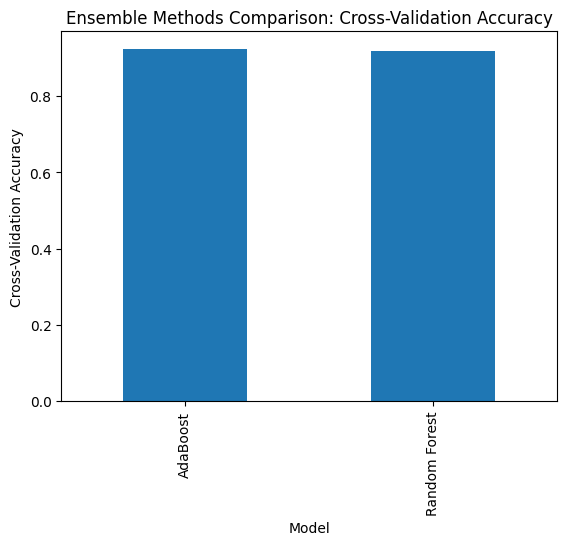

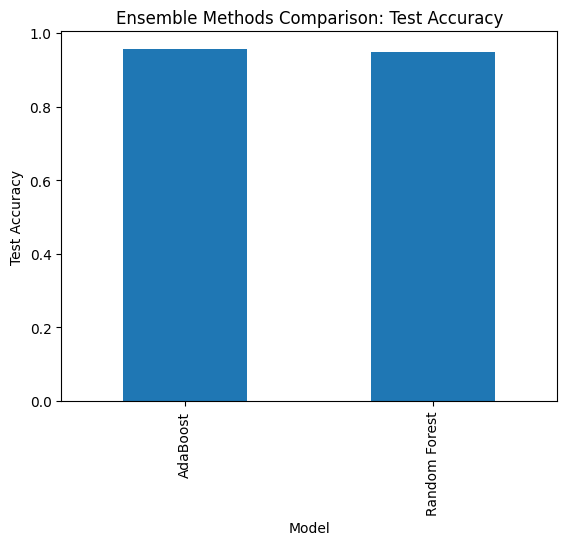

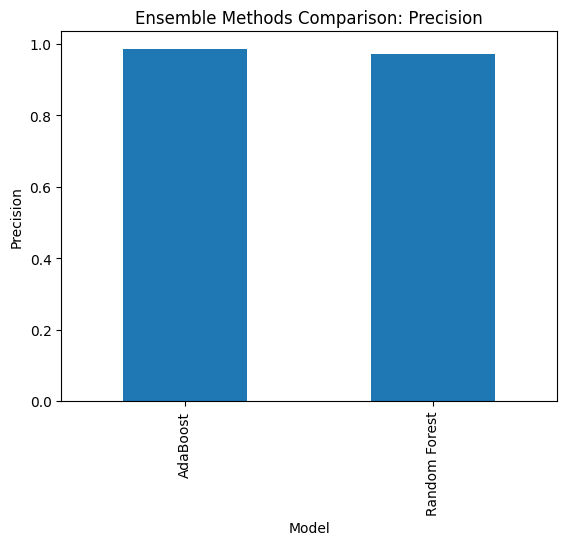

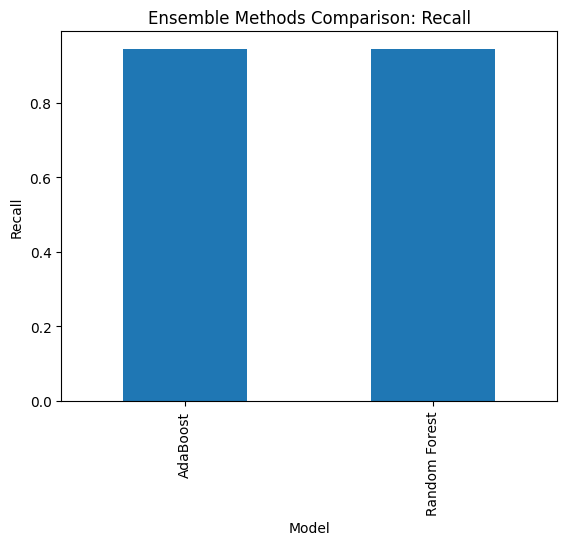

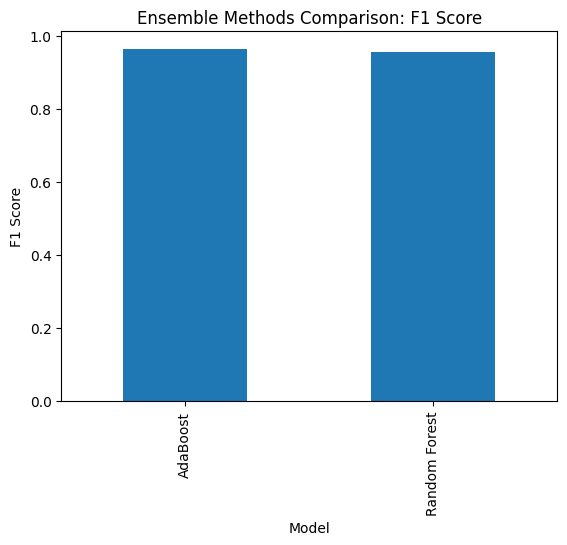

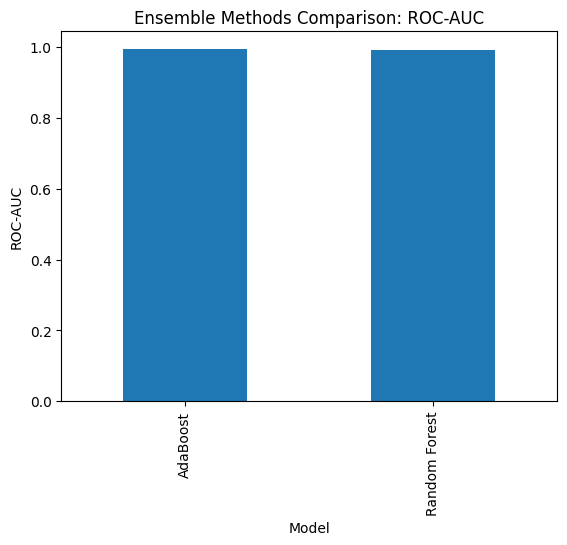

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Breast_cancer_data.csv')

# Display the first few rows of the data to ensure it's loaded correctly
print(data.head())

# Check if 'diagnosis' is in the dataset columns
if 'diagnosis' in data.columns:
    # Separate features (X) and target variable (y)
    X = data.drop('diagnosis', axis=1)  # Features (all columns except 'diagnosis')
    y = data['diagnosis']  # Target variable ('diagnosis')

    # Check the unique values in 'diagnosis' to confirm its format
    print("Unique values in 'diagnosis':", y.unique())

    # Map the target variable to numerical values (if it's not already)
    if y.dtype == 'object':  # if the diagnosis is categorical (e.g., 'M' and 'B')
        y = y.map({'M': 1, 'B': 0})  # Assuming 'M' is Malignant (1) and 'B' is Benign (0))

    # Check if there are any missing values in X or y
    print("Missing values in the features:")
    print(X.isnull().sum())
    print("Missing values in the target variable 'y':", y.isnull().sum())

    # Handle missing values in the features by dropping rows with NaN values
    X = X.dropna()

    # Ensure that y doesn't have missing values
    y = y.dropna()  # Remove any rows with NaN values in the target

    # Check the lengths of X and y
    print(f"Length of X: {len(X)}")
    print(f"Length of y: {len(y)}")

    # If lengths match, proceed with splitting the data
    if len(X) == len(y):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Scale the data (necessary for ensemble models)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Initialize results dictionary
        ensemble_results = {}

        # 1. Boosting with AdaBoost
        adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
        cv_scores_adaboost = cross_val_score(adaboost, X_train_scaled, y_train, cv=5, scoring='accuracy')
        adaboost.fit(X_train_scaled, y_train)
        y_pred_adaboost = adaboost.predict(X_test_scaled)
        y_proba_adaboost = adaboost.predict_proba(X_test_scaled)[:, 1]

        ensemble_results['AdaBoost'] = {
            'Cross-Validation Accuracy': cv_scores_adaboost.mean(),
            'Test Accuracy': accuracy_score(y_test, y_pred_adaboost),
            'Precision': precision_score(y_test, y_pred_adaboost),
            'Recall': recall_score(y_test, y_pred_adaboost),
            'F1 Score': f1_score(y_test, y_pred_adaboost),
            'ROC-AUC': roc_auc_score(y_test, y_proba_adaboost),
        }

        # 2. Bagging with Random Forestr2
        random_forest = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
        cv_scores_rf = cross_val_score(random_forest, X_train_scaled, y_train, cv=5, scoring='accuracy')
        random_forest.fit(X_train_scaled, y_train)
        y_pred_rf = random_forest.predict(X_test_scaled)
        y_proba_rf = random_forest.predict_proba(X_test_scaled)[:, 1]

        ensemble_results['Random Forest'] = {
            'Cross-Validation Accuracy': cv_scores_rf.mean(),
            'Test Accuracy': accuracy_score(y_test, y_pred_rf),
            'Precision': precision_score(y_test, y_pred_rf),
            'Recall': recall_score(y_test, y_pred_rf),
            'F1 Score': f1_score(y_test, y_pred_rf),
            'ROC-AUC': roc_auc_score(y_test, y_proba_rf),
        }

        # Compare ensemble methods
        print("Comparison of Ensemble Methods:")
        for model, metrics in ensemble_results.items():
            print(f"\n{model}")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")


        # Visualization of results
        results_df = pd.DataFrame(ensemble_results).T
        for metric in ['Cross-Validation Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']:
            if metric in results_df.columns:
                results_df[metric].plot(kind='bar', title=f'Ensemble Methods Comparison: {metric}')
                plt.xlabel('Model')
                plt.ylabel(metric)
                plt.show()

    else:
        print("Mismatch in the number of samples between X and y. Please check your data.")
else:
    print("Target variable 'y' is empty. Please check the dataset.")
